Rename the notebook as Lastname.Firstname-A1.ipynb for submission.

1. Import required packages.
2. Get a data file with real estate listings for a town of your choice from redfin.com
3. Select only the following columns from the dataset: 'PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'.

3 pts.

In [26]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

from google.colab import files
uploaded = files.upload()

import io
listings = pd.read_csv(io.BytesIO(uploaded['redfin_2023-09-27-14-51-07 (5).csv']))

Saving redfin_2023-09-27-14-51-07.csv to redfin_2023-09-27-14-51-07 (5).csv


In [27]:
listings = listings[['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']]

4. Check for missing values using a heatmap.
5. Check data distribution by property type using a histogram (bar graph).
6. Exclude records if appropriate.

3 pts.



<Axes: >

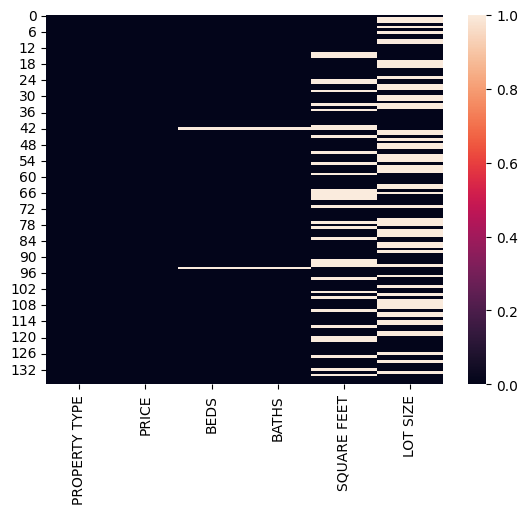

In [28]:
sns.heatmap(listings.isnull(), cbar=True)

In [29]:
property_types_to_remove = ['Vacant Land', 'Multi-Family (5+ Unit)','Townhouse']

listings.drop(listings[listings['PROPERTY TYPE'].isin(property_types_to_remove)].index, inplace=True)

<Axes: >

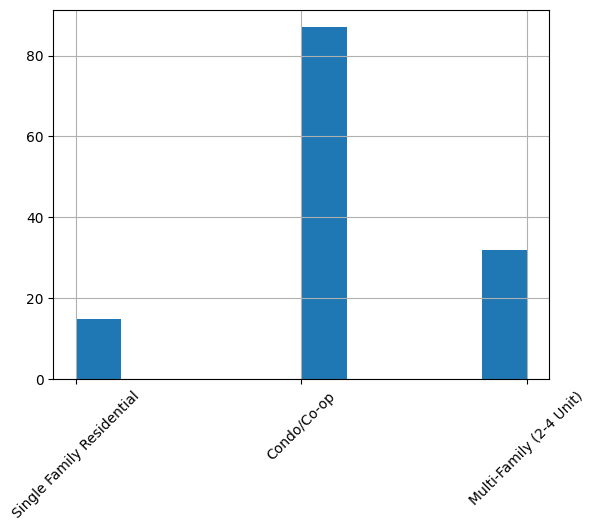

In [30]:
listings['PROPERTY TYPE'].hist(xrot=45.0)

7. Build a pairplot to evaluate data distributions and correlations.
8. Comment whether the predictors: 1) have a linear relationship with the target (Price), 2) display constant variance (homoscedasticity), 3) contain outliers that need to be excluded.

5 pts.

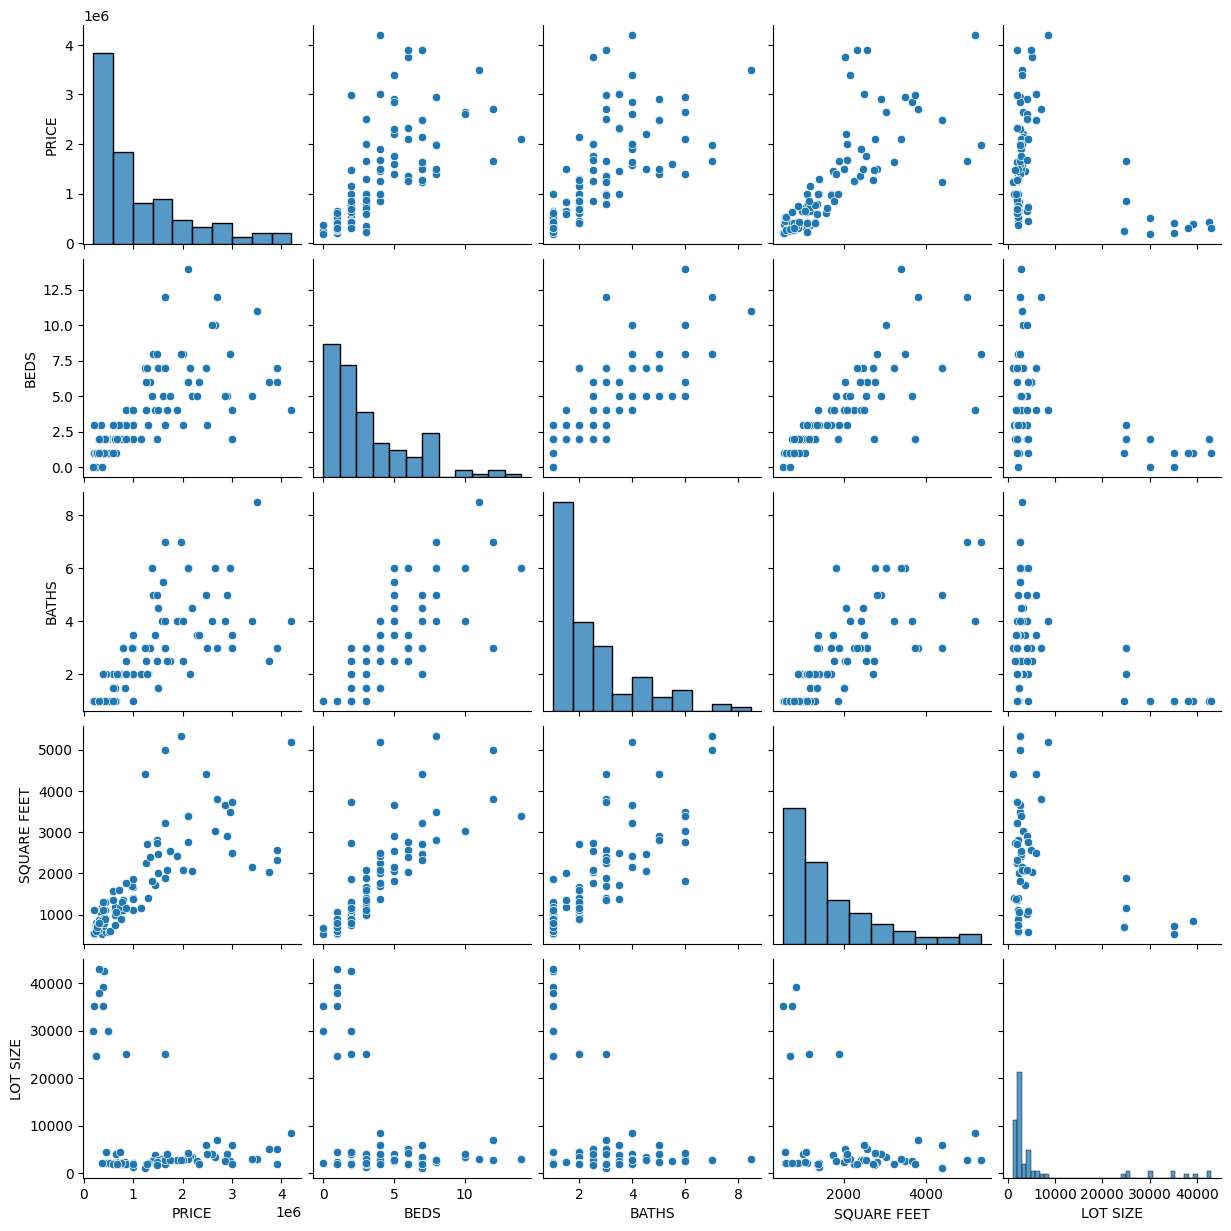

In [31]:
sns.pairplot(listings)
#Square feet,baths and beds are all indicating a positive linear relationship with price. None of them show homoscedasticity. Lot size does not appear linear with pricepossibly due to the outliers in lot size.

9. Remove outliers if necessary.
10. Impute missing values as appropriate.

2 pts.


In [32]:
listings.drop(listings[listings['SQUARE FEET'] > 4000 ].index, inplace=True)
listings.drop(listings[listings['LOT SIZE'] > 100000 ].index, inplace=True)
imputed = listings.fillna(listings.mean(numeric_only=True))
#I decided to remove those values because they clearly are outliers when viewing the pairplot

In [33]:
imputed.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,1.290000e+02,129.000000,129.000000,129.000000,129.000000
mean,1.037662e+06,3.108527,2.162791,1470.673469,7504.375000
std,9.166886e+05,2.595791,1.480555,739.724017,8514.842893
min,1.890000e+05,0.000000,1.000000,520.000000,1250.000000
25%,3.650000e+05,1.000000,1.000000,900.000000,2500.000000
50%,6.490000e+05,2.000000,2.000000,1470.673469,7504.375000
75%,1.480000e+06,4.000000,3.000000,1678.000000,7504.375000
max,3.900000e+06,14.000000,8.500000,3816.000000,43000.000000


11. Split data 70/30 into training and test datasets.
12. Build a multiple linear regression model to predict Price.
13. Report R2, MAE, Max error, RMSE.
14. Comment on whether the model performance would be acceptable for practitioners.

7 pts.

In [34]:
predictors = ['PROPERTY TYPE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']
X = pd.get_dummies(imputed[predictors], drop_first=True)
y = imputed['PRICE']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [35]:
re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression()

In [36]:
re_prices.intercept_

-69407.55196565669

In [37]:
re_prices.coef_

array([ 9.13119429e+04,  8.67224467e+04,  2.77549465e+02, -1.14428831e+00,
        5.73571148e+05,  1.16217259e+06])

In [38]:
train_X.head()

,BEDS,BATHS,SQUARE FEET,LOT SIZE,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Single Family Residential
61,3.0,3.0,1360.000000,2000.0,1,0
45,2.0,1.0,1470.673469,30000.0,0,0
69,12.0,3.0,3816.000000,7000.0,1,0
89,3.0,2.5,2069.000000,3000.0,0,1
11,0.0,1.0,520.000000,35205.0,0,0


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

In [40]:
pred_y = re_prices.predict(valid_X)

In [41]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))


Regression model performance evaluation
R2:  0.4655160868360543
MAE:  251989.5452688214
RMSE:  404982.99857509614
Max error:  1203995.359876839


My model's performance is not good enough for a practioner. The R2 value means the model represents appoximately 46.5% of the price variance. This is a poor model. In addition the MAE shows that price's predicted and actual values has an average error of around 251,989 dollars. The RMSE shows a similar metric to MAE but focuses on the potential of bigger possible errors which explains the RMSE number of $404,982. Finally max error shows the biggest difference between predicted value and actual value which was $1,203,995. These discrepancies are too large for a buyer or seller to use. A buyer or seller that uses this model would not appreciate such a difference in their purchase or sale of a home.